# 第二章 图片总结应用 🖼️📝

加载HF API密钥和相关Python库

In [1]:
import os
import io
import IPython.display
from PIL import Image
import base64 
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
hf_api_key = os.environ['HF_API_KEY']

In [ ]:
# Helper functions
import requests, json

#Image-to-text endpoint
def get_completion(inputs, parameters=None, ENDPOINT_URL=os.environ['HF_API_ITT_BASE']): 
    headers = {
      "Authorization": f"Bearer {hf_api_key}",
      "Content-Type": "application/json"
    }
    data = { "inputs": inputs }
    if parameters is not None:
        data.update({"parameters": parameters})
    response = requests.request("POST",
                                ENDPOINT_URL,
                                headers=headers,
                                data=json.dumps(data))
    return json.loads(response.content.decode("utf-8"))

## 一、构建一个图片标题App 

在这里，我们使用一个[Inference Endpoint](https://huggingface.co/inference-endpoints)用于“Salesforce/blip-image-caption-base”一个14M参数的图面总结模型。

如果在本地运行而不是从API，代码需要稍作修改。同学们可以查看[Pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines)文档页面。

此处笔者选择使用本地模型，模型下载地址：https://huggingface.co/Salesforce/blip-image-captioning-base

In [14]:
# 导入所需的库
from transformers import pipeline

# 创建一个图像描述生成的pipeline，使用预训练模型"Salesforceblip-image-captioning-base"
get_completion = pipeline("image-to-text", model="Salesforceblip-image-captioning-base")

# 定义一个函数用于生成图像描述
def generate_image_caption(input):
    # 使用pipeline生成图像描述
    output = get_completion(input)
    # 返回生成的图像描述
    return output[0]['generated_text']

这是一个免费的图片网站（需要一点点magic~）: https://free-images.com/

In [13]:
# # 图像URL
image_url = "https://free-images.com/sm/9596/dog_animal_greyhound_983023.jpg"
# # 显示图像
display(IPython.display.Image(url=image_url))
# 创建图像描述生成的pipeline，使用预训练模型"Salesforceblip-image-captioning-base"
get_completion(image_url)

d:\anaconda\anaconda_install\envs\gpt\lib\site-packages\transformers\generation\utils.py:1369: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'a dog wearing a santa hat and scarf'}]

## 二、图片标题APP `gr.Interface()`

### 2.1 参数解析

- fn=captioner: 这是用于处理输入的函数，即图像描述生成函数 captioner。
- inputs=[gr.Image(label="Upload image", type="pil")]: 这定义了输入部分。使用 gr.Image 部件来允许用户上传图像，label 参数设置了输入部件的标签，type 参数指定输入类型为PIL图像。
- outputs=[gr.Textbox(label="Caption")]: 这定义了输出部分。使用 gr.Textbox 部件来显示生成的图像描述，label 参数设置了输出部件的标签。
- title="Image Captioning with BLIP": 这是界面的标题，将显示在界面的顶部。
- description="Caption any image using the BLIP model": 这是界面的描述，提供有关界面功能的更多信息。
- allow_flagging="never": 这设置了不允许标记内容，确保不会显示标记不恰当内容的选项。
- examples=[...]: 这提供了一组示例图像文件名，用于展示界面功能。用户可以从这些示例中选择图像来查看生成的描述。

In [ ]:
# 导入所需的库
import gradio as gr
import io
import base64

# 将PIL图像转换为base64编码的字符串
def image_to_base64_str(pil_image):
    byte_arr = io.BytesIO()
    pil_image.save(byte_arr, format='PNG')
    byte_arr = byte_arr.getvalue()
    return str(base64.b64encode(byte_arr).decode('utf-8'))

# 图像描述生成函数，类似于之前定义的函数
def captioner(image):
    # 将上传的图像转换为base64字符串
    base64_image = image_to_base64_str(image)
    # 使用图像描述生成的pipeline生成图像描述
    result = get_completion(base64_image)
    return result[0]['generated_text']

# 关闭之前的Gradio界面（如果有的话）
gr.close_all()

# 创建Gradio界面，接受上传的图像并显示描述
demo = gr.Interface(
    fn=captioner,  # 指定用于处理输入的函数
    inputs=[gr.Image(label="Upload image", type="pil")],  # 输入部分的设置，允许上传图像
    outputs=[gr.Textbox(label="Caption")],  # 输出部分的设置，显示生成的图像描述
    title="Image Captioning with BLIP",  # 界面标题
    description="Caption any image using the BLIP model",  # 界面描述
    allow_flagging="never",  # 设置不允许标记内容
)

# 启动共享模式的界面，允许其他用户访问
demo.launch(share=True)


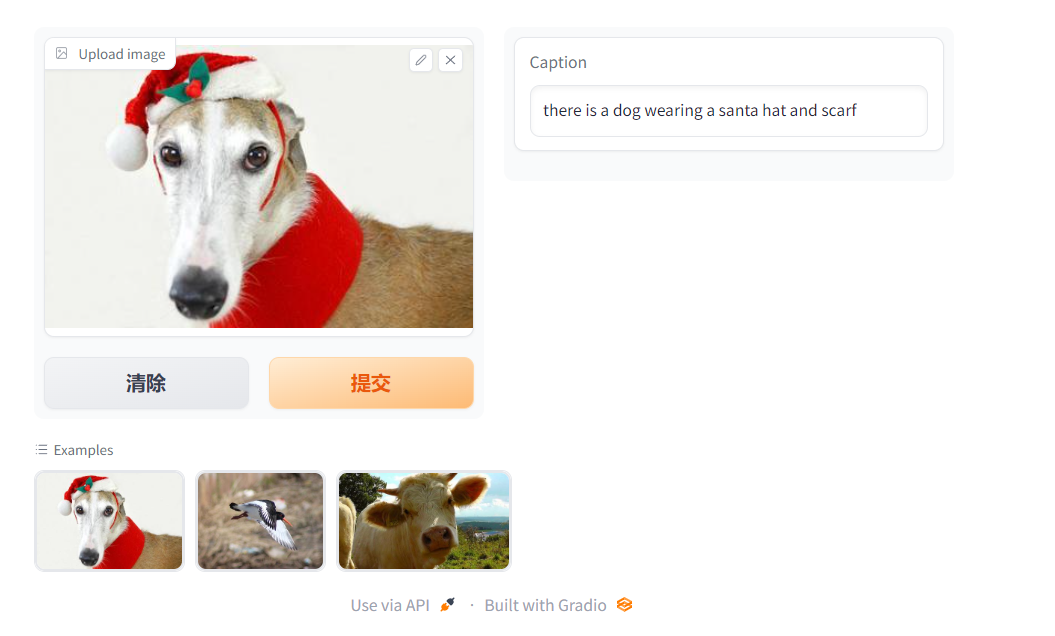

In [21]:
gr.close_all()

Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
